In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fahd09/hadith-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\aodih\.cache\kagglehub\datasets\fahd09\hadith-dataset\versions\1


In [3]:
import pandas as pd

In [4]:
hadith = pd.read_csv(path + "/all_hadiths_clean.csv")

In [5]:
hadith

,id,hadith_id,source,chapter_no,hadith_no,chapter,chain_indx,text_ar,text_en
0,0,1,Sahih Bukhari,1,1,Revelation - كتاب بدء الوحى,"30418, 20005, 11062, 11213, 11042, 3",حدثنا الحميدي عبد الله بن الزبير، قال حدثنا سف...,Narrated 'Umar bin Al-Khattab: ...
1,1,2,Sahih Bukhari,1,2,Revelation - كتاب بدء الوحى,"30355, 20001, 11065, 10511, 53",حدثنا عبد الله بن يوسف، قال أخبرنا مالك، عن هش...,Narrated 'Aisha: ...
2,2,3,Sahih Bukhari,1,3,Revelation - كتاب بدء الوحى,"30399, 20023, 11207, 11013, 10511, 53",حدثنا يحيى بن بكير، قال حدثنا الليث، عن عقيل، ...,Narrated 'Aisha: (the m...
3,3,4,Sahih Bukhari,1,4,Revelation - كتاب بدء الوحى,"11013, 10567, 34",قال ابن شهاب وأخبرني أبو سلمة بن عبد الرحمن، أ...,Narrated Jabir bin 'Abdullah Al-Ansari while ...
4,4,5,Sahih Bukhari,1,5,Revelation - كتاب بدء الوحى,"20040, 20469, 11399, 11050, 17",حدثنا موسى بن إسماعيل، قال حدثنا أبو عوانة، قا...,Narrated Said bin Jubair: ...
...,...,...,...,...,...,...,...,...,...
34436,173,54223,Sunan Ibn Majah,36,4234,Tribulations - كتاب الفتن,"30285, 20733, 20399, 11412, 11027, 3051",حدثنا عبد الرحمن بن إبراهيم، حدثنا الوليد بن م...,It was narrated from ‘Awf bin Malik Al-Ashja’...
34437,174,54224,Sunan Ibn Majah,36,4235,Tribulations - كتاب الفتن,"30201, 20005, 11013, 11002",حدثنا أبو بكر بن أبي شيبة، حدثنا سفيان بن عيين...,It was narrated from Abu Hurairah conveying i...
34438,175,54225,Sunan Ibn Majah,36,4236,Tribulations - كتاب الفتن,"30201, 20005, 11061, 11197, 13",حدثنا أبو بكر بن أبي شيبة، حدثنا سفيان بن عيين...,It was narrated from Abu Hurairah that the Me...
34439,176,54226,Sunan Ibn Majah,36,4237,Tribulations - كتاب الفتن,"30201, 20380, 11272, 11016, 5200",حدثنا أبو بكر بن أبي شيبة، حدثنا أسود بن عامر،...,It was narrated that ‘Amr bin Taghlib said: ...


In [16]:
hadith.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34441 entries, 0 to 34440
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               34441 non-null  int64 
 1   hadith_id        34441 non-null  int64 
 2   source           34441 non-null  object
 3   chapter_no       34441 non-null  int64 
 4   hadith_no        34441 non-null  object
 5   chapter          34441 non-null  object
 6   chain_indx       34318 non-null  object
 7   text_ar          34433 non-null  object
 8   text_en          33588 non-null  object
 9   missing_text_en  34441 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 2.6+ MB


In [8]:
hadith["text_en"][1]

'      Narrated \'Aisha:                          (the mother of the faithful believers) Al-Harith bin Hisham asked Allah\'s Apostle "O Allah\'s Apostle! How is the Divine Inspiration revealed to you?" Allah\'s Apostle replied, "Sometimes it is (revealed) like the ringing of a bell, this form of Inspiration is the hardest of all and then this state passes off after I have grasped what is inspired. Sometimes the Angel comes in the form of a man and talks to me and I grasp whatever he says." \'Aisha added: Verily I saw the Prophet being inspired divinely on a very cold day and noticed the sweat dropping from his forehead (as the Inspiration was over).'

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

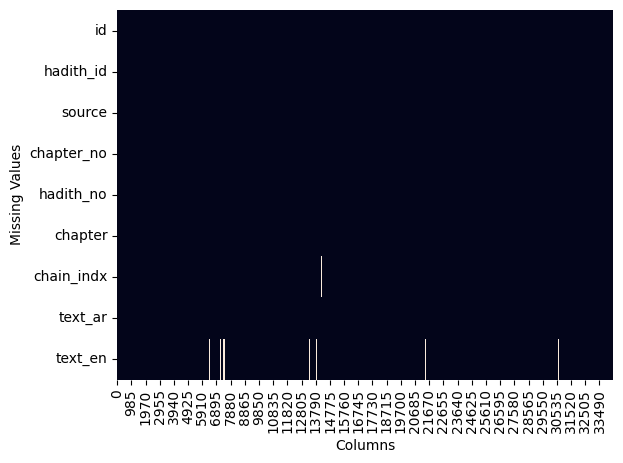

In [10]:
ax = plt.axes()
sns.heatmap(hadith.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing Values")

plt.show()

In [12]:
import numpy as np

hadith["missing_text_en"] = np.where(hadith["text_en"].isna(), 1, 0)

In [26]:
filtered_missing = hadith[hadith["missing_text_en"] == 0 & ~hadith["chain_indx"].isna()]

In [27]:
filtered_missing

,id,hadith_id,source,chapter_no,hadith_no,chapter,chain_indx,text_ar,text_en,missing_text_en
0,0,1,Sahih Bukhari,1,1,Revelation - كتاب بدء الوحى,"30418, 20005, 11062, 11213, 11042, 3",حدثنا الحميدي عبد الله بن الزبير، قال حدثنا سف...,Narrated 'Umar bin Al-Khattab: ...,0
1,1,2,Sahih Bukhari,1,2,Revelation - كتاب بدء الوحى,"30355, 20001, 11065, 10511, 53",حدثنا عبد الله بن يوسف، قال أخبرنا مالك، عن هش...,Narrated 'Aisha: ...,0
2,2,3,Sahih Bukhari,1,3,Revelation - كتاب بدء الوحى,"30399, 20023, 11207, 11013, 10511, 53",حدثنا يحيى بن بكير، قال حدثنا الليث، عن عقيل، ...,Narrated 'Aisha: (the m...,0
3,3,4,Sahih Bukhari,1,4,Revelation - كتاب بدء الوحى,"11013, 10567, 34",قال ابن شهاب وأخبرني أبو سلمة بن عبد الرحمن، أ...,Narrated Jabir bin 'Abdullah Al-Ansari while ...,0
4,4,5,Sahih Bukhari,1,5,Revelation - كتاب بدء الوحى,"20040, 20469, 11399, 11050, 17",حدثنا موسى بن إسماعيل، قال حدثنا أبو عوانة، قا...,Narrated Said bin Jubair: ...,0
...,...,...,...,...,...,...,...,...,...,...
34436,173,54223,Sunan Ibn Majah,36,4234,Tribulations - كتاب الفتن,"30285, 20733, 20399, 11412, 11027, 3051",حدثنا عبد الرحمن بن إبراهيم، حدثنا الوليد بن م...,It was narrated from ‘Awf bin Malik Al-Ashja’...,0
34437,174,54224,Sunan Ibn Majah,36,4235,Tribulations - كتاب الفتن,"30201, 20005, 11013, 11002",حدثنا أبو بكر بن أبي شيبة، حدثنا سفيان بن عيين...,It was narrated from Abu Hurairah conveying i...,0
34438,175,54225,Sunan Ibn Majah,36,4236,Tribulations - كتاب الفتن,"30201, 20005, 11061, 11197, 13",حدثنا أبو بكر بن أبي شيبة، حدثنا سفيان بن عيين...,It was narrated from Abu Hurairah that the Me...,0
34439,176,54226,Sunan Ibn Majah,36,4237,Tribulations - كتاب الفتن,"30201, 20380, 11272, 11016, 5200",حدثنا أبو بكر بن أبي شيبة، حدثنا أسود بن عامر،...,It was narrated that ‘Amr bin Taghlib said: ...,0


In [28]:
filtered_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33588 entries, 0 to 34440
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               33588 non-null  int64 
 1   hadith_id        33588 non-null  int64 
 2   source           33588 non-null  object
 3   chapter_no       33588 non-null  int64 
 4   hadith_no        33588 non-null  object
 5   chapter          33588 non-null  object
 6   chain_indx       33536 non-null  object
 7   text_ar          33580 non-null  object
 8   text_en          33588 non-null  object
 9   missing_text_en  33588 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 2.8+ MB


In [30]:
filtered_missing.drop(columns=["missing_text_en"], axis=1).to_csv("csv/filtered_hadith.csv", index=False)